In [2]:
import pandas as pd

df = pd.read_csv("Nutrical Dataset.csv")
# print(df)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [3]:
print(df.isnull().sum())

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


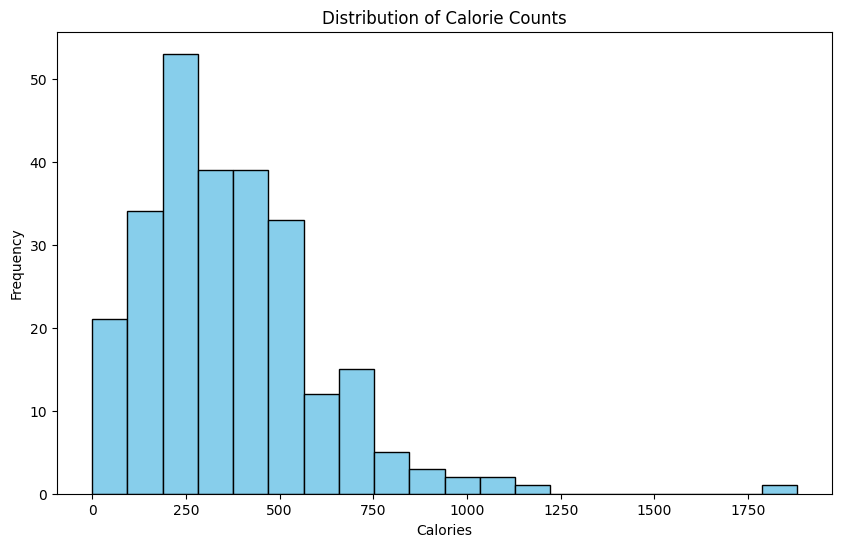

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calorie Counts')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

In [7]:
print(df[['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']].describe())

        Total Fat  Saturated Fat  Cholesterol       Sodium  Carbohydrates  \
count  260.000000     260.000000   260.000000   260.000000     260.000000   
mean    14.165385       6.007692    54.942308   495.750000      47.346154   
std     14.205998       5.321873    87.269257   577.026323      28.252232   
min      0.000000       0.000000     0.000000     0.000000       0.000000   
25%      2.375000       1.000000     5.000000   107.500000      30.000000   
50%     11.000000       5.000000    35.000000   190.000000      44.000000   
75%     22.250000      10.000000    65.000000   865.000000      60.000000   
max    118.000000      20.000000   575.000000  3600.000000     141.000000   

       Dietary Fiber      Sugars     Protein  
count     260.000000  260.000000  260.000000  
mean        1.630769   29.423077   13.338462  
std         1.567717   28.679797   11.426146  
min         0.000000    0.000000    0.000000  
25%         0.000000    5.750000    4.000000  
50%         1.000000   1

In [8]:
trend_data = df.groupby('Category').agg({'Total Fat': 'mean', 'Saturated Fat': 'mean', 'Cholesterol': 'mean', 'Sodium': 'mean', 'Carbohydrates': 'mean', 'Dietary Fiber': 'mean', 'Sugars': 'mean', 'Protein': 'mean'})
print(trend_data)

                    Total Fat  Saturated Fat  Cholesterol       Sodium  \
Category                                                                 
Beef & Pork         24.866667      10.466667    87.333333  1020.666667   
Beverages            0.092593       0.055556     0.555556    41.481481   
Breakfast           27.690476      10.654762   152.857143  1211.071429   
Chicken & Fish      26.962963       6.166667    75.370370  1257.777778   
Coffee & Tea         8.021053       4.921053    27.263158   136.894737   
Desserts             7.357143       4.285714    15.000000   117.142857   
Salads              11.750000       3.750000    51.666667   588.333333   
Smoothies & Shakes  14.125000       8.375000    45.000000   183.571429   
Snacks & Sides      10.538462       2.692308    18.461538   395.769231   

                    Carbohydrates  Dietary Fiber     Sugars    Protein  
Category                                                                
Beef & Pork             40.133333      

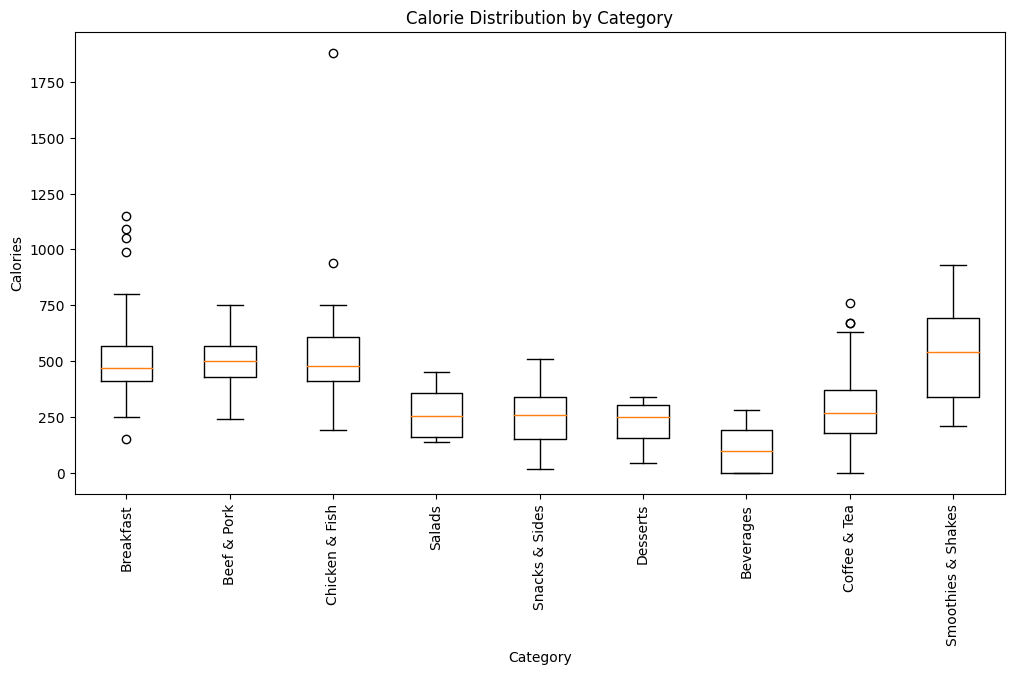

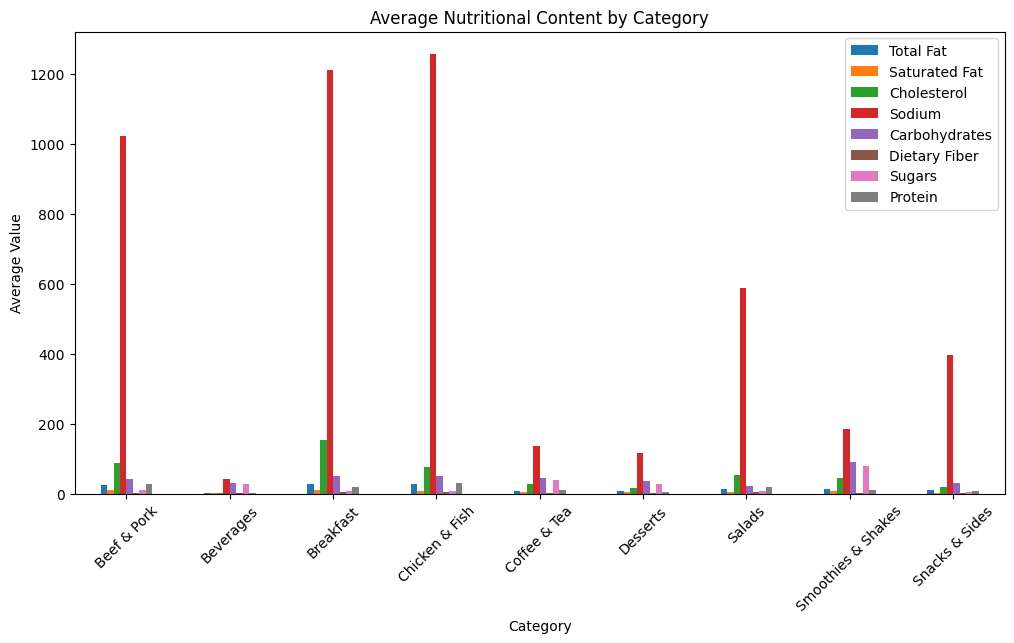

In [14]:
# Box plot of calorie distribution by category
plt.figure(figsize=(12, 6))
categories = df['Category'].unique()
calorie_data = [df[df['Category'] == category]['Calories'] for category in categories]
plt.boxplot(calorie_data, labels=categories)
plt.title('Calorie Distribution by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Calories')
plt.show()
# Bar chart comparing nutritional characteristics of different food categories
nutritional_cols = ['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']
nutritional_data = df.groupby('Category')[nutritional_cols].mean()
nutritional_data.plot(kind='bar', figsize=(12, 6))
plt.title('Average Nutritional Content by Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Menu items with highest and lowest calorie counts
highest_calories = df[df['Calories'] == df['Calories'].max()]
lowest_calories = df[df['Calories'] == df['Calories'].min()]
print("Menu item with highest calorie count:\n", highest_calories)
print("\nMenu item with lowest calorie count:\n", lowest_calories)

Menu item with highest calorie count:
           Category                          Item     Serving Size  Calories  \
82  Chicken & Fish  Chicken McNuggets (40 piece)  22.8 oz (646 g)      1880   

    Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
82               1060      118.0                        182           20.0   

    Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
82                            101        1.0  ...            118   

    Carbohydrates (% Daily Value)  Dietary Fiber  \
82                             39              6   

    Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
82                             24       1       87                          0   

    Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
82                         15                        8                    25  

[1 rows x 24 columns]

Menu item with lowest calorie count:
          Category   

In [15]:
average_nutrition = df.groupby('Category')[nutritional_cols].mean()
print(average_nutrition)

                    Total Fat  Saturated Fat  Cholesterol       Sodium  \
Category                                                                 
Beef & Pork         24.866667      10.466667    87.333333  1020.666667   
Beverages            0.092593       0.055556     0.555556    41.481481   
Breakfast           27.690476      10.654762   152.857143  1211.071429   
Chicken & Fish      26.962963       6.166667    75.370370  1257.777778   
Coffee & Tea         8.021053       4.921053    27.263158   136.894737   
Desserts             7.357143       4.285714    15.000000   117.142857   
Salads              11.750000       3.750000    51.666667   588.333333   
Smoothies & Shakes  14.125000       8.375000    45.000000   183.571429   
Snacks & Sides      10.538462       2.692308    18.461538   395.769231   

                    Carbohydrates  Dietary Fiber     Sugars    Protein  
Category                                                                
Beef & Pork             40.133333      